# Project description

Context

Together with the marketing department, you have prepared a list of hypotheses for increasing revenue.
Prioritize hypotheses, run an A / B test, and analyze the results.

#### Table of Contents

### [Part 1. Prioritizing hypotheses.](#Part_1)
* [Uploading data](#Step_1)
* [Using the ICE framework to prioritize hypotheses](#Step_2)
* [Using the RICE framework to prioritize hypotheses](#Step_3)
* [Conclusions](#Step_4)

### [Part 2. A/B Test Analysis](#Part_2)
* [Uploading Data](#Step_1_2)
* [Cumulative Revenue, Average receipt, and Conversion](#Step_2_2)
* [Cumulative Conversion](#Step_3_2)
* [Orders](#Step_4_2)
* [Calculating statistical significance](#Step_5_3)

### [General output](#Conclusion)

<a id = 'Part_1' > </a>
# Part 1. Prioritizing hypotheses

<a id = 'Step_1' > </a>
### Uploading data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')

In [3]:
hypothesis.head(2)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10


In [4]:
hypothesis.columns = ['hypothesis','reach','impact','confidence','efforts']

In [5]:
hypothesis.head(4)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8


* Hypothesis - a brief description of the hypothesis;
* Reach - user coverage on a 10-point scale;
* Impact - impact on users on a 10-point scale;
* Confidence - confidence in the hypothesis on a 10-point scale;
* Efforts - the cost of resources to test the hypothesis on a 10-point scale. The higher the value of Efforts, the more expensive the hypothesis test is.

<a id = 'Step_2' > </a>
### Using the ICE framework to prioritize hypotheses

In [6]:
hypothesis['sorting_ice'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).astype(int)

In [7]:
hypothesis_ice = hypothesis.sort_values(by = 'sorting_ice', ascending = False).reset_index()
hypothesis_ice.head(3).drop(labels = 'index', axis = 1)

,hypothesis,reach,impact,confidence,efforts,sorting_ice
0,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16
1,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13
2,Добавить форму подписки на все основные страни...,10,7,8,5,11


In [8]:
hypothesis_ice['hypothesis'][0]

'Запустить акцию, дающую скидку на товар в день рождения'

Prioritized hypothesis : 'Launch a promotion that gives a discount on the product on the birthday'

<a id = 'Step_3' > </a>
### Using the RICE framework to prioritize hypotheses

In [9]:
hypothesis['sorting_rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).astype('int')
hypothesis_rice = hypothesis.sort_values(by = 'sorting_rice', ascending = False).reset_index()

In [10]:
pd.options.display.max_colwidth = 150
hypothesis_rice.head(3).drop(labels = 'index', axis = 1)

,hypothesis,reach,impact,confidence,efforts,sorting_ice,sorting_rice
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11,112
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13,40


<a id = 'Step_4' > </a>
## Conclusions

We see that when using the ICE framework, the priority hypothesis turned out to be the hypothesis of a discount on the birthday. When prioritizing RICE, the hypothesis of subscribing to email newsletters is in the first place.
The differences in priorities are due to the fact that the ICE framework does not take into account the parameter of the number of users affected by the change. Therefore, for example, in the first case, the priority was the hypothesis about birthdays, but from the table we see that reach for this hypothesis = 1, most likely, this is due to the fact that only a small number of people are willing to provide their personal data.
However, in the second case(RICE), the number of users parameter makes a significant contribution to the total number, since this change is likely to cover all users.

<a id = 'Part_2' > </a>
# Part 2. Analysis of the A / B test

<a id = 'Step_1_2' > </a>
### Step 1. Uploading the data

##### Data description

File /datasets/orders.csv.
* TransactionID-order ID;
* visitorID-ID of the user who made the order;
* date — the date when the order was made;
* revenue — order revenue;
* group — the A/B test group that the order was placed in.

In [11]:
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [12]:
display(orders.info())
display(orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

0

In [13]:
orders['date'] = orders['date'].map(lambda x : dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
orders.columns = ['transaction_id','visitor_id','date','revenue','group']
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


The /datasets/visitors.csv file.
* date — date;
* group — A/B test group;
* visitors — the number of users on the specified date in the specified A/B test group
* group — the A/B test group that the order was placed in.

In [15]:
visitors['date'] = visitors['date'].map(lambda x : dt.datetime.strptime(x, '%Y-%m-%d'))

In [16]:
display(visitors.info())
display(visitors.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

0

Let's see if there are intersections of users by groups.

In [17]:
orders_visitors = orders.groupby('visitor_id').agg({'group':'nunique'})
orders_visitors.columns = ['number_groups']
orders_visitors[orders_visitors['number_groups'] > 1].count()

number_groups    58
dtype: int64

In [18]:
orders.groupby('group').agg({'visitor_id':'nunique'})

,visitor_id
group,
A,503
B,586


We see that a small number of users overlap in groups(about 5%). This is probably due to the fact that people log in from different devices.

There are no missing values or duplicates, the data is set to the correct types and is ready for further analysis.

<a id = 'Step_2_2' > </a>
### Step 2. Analyze the A / B test.

##### Let's plot the cumulative revenue by group.

In [19]:
# array of unique date and group value pairs
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [20]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [21]:
# we will get aggregated cumulative data on orders by day
aggorders = datesGroups.apply(lambda x : orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                             .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
aggorders

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [22]:
# Similarly, we will get aggregated cumulative data on the visitors of the online store by day
aggvisitors = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
{'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1).sort_values(by = ['date','group'])

In [23]:
# combining cumulative data in a single table
cumulativeData = aggorders.merge(aggvisitors, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


Let's plot the cumulative revenue graphs.

In [24]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'orders']]

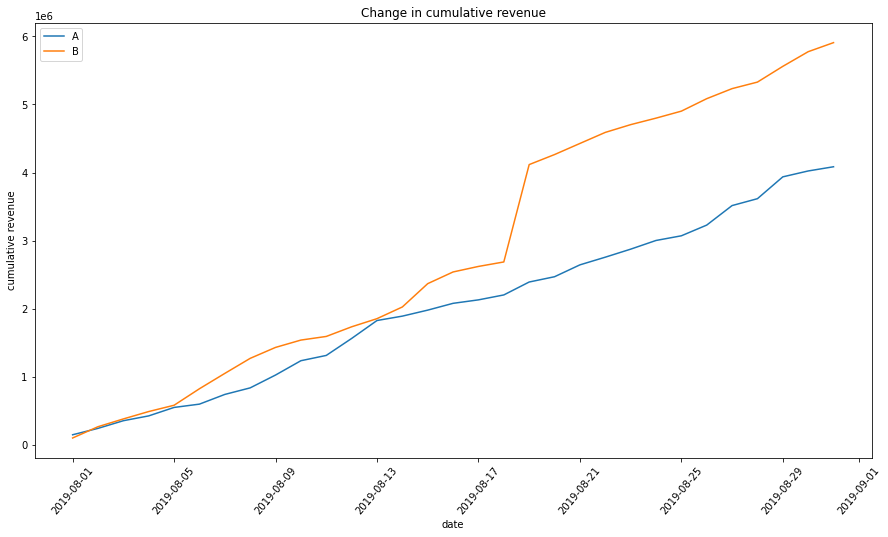

In [25]:
plt.figure(figsize = (15,8))
plt.xlabel('date')
plt.ylabel('cumulative revenue')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.xticks(rotation=50)
plt.title('Change in cumulative revenue')
plt.show()

Revenue increases evenly throughout the test. We also see that in group B, the graph grows sharply at one point. This may indicate an anomaly or a very expensive purchase.

##### Let's plot the cumulative average check

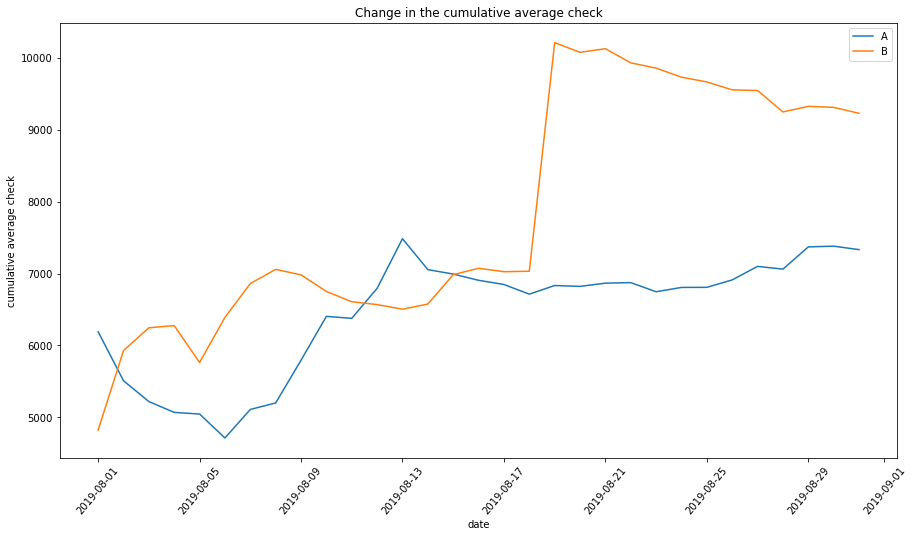

In [26]:
# Divide the cumulative revenue by the number of orders
plt.figure(figsize = (15,8))
plt.xlabel('date')
plt.ylabel('cumulative average check')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=50)
plt.title('Change in the cumulative average check')
plt.show()

The average check actively grew and becomes uniform towards the end of observations. At B falls after a sharp rise, at A stopped at the same level. Sharp spikes most likely indicate that there were expensive orders between the 17th and 21st numbers.

##### Plot the relative change in the cumulative average check of group B to group A.

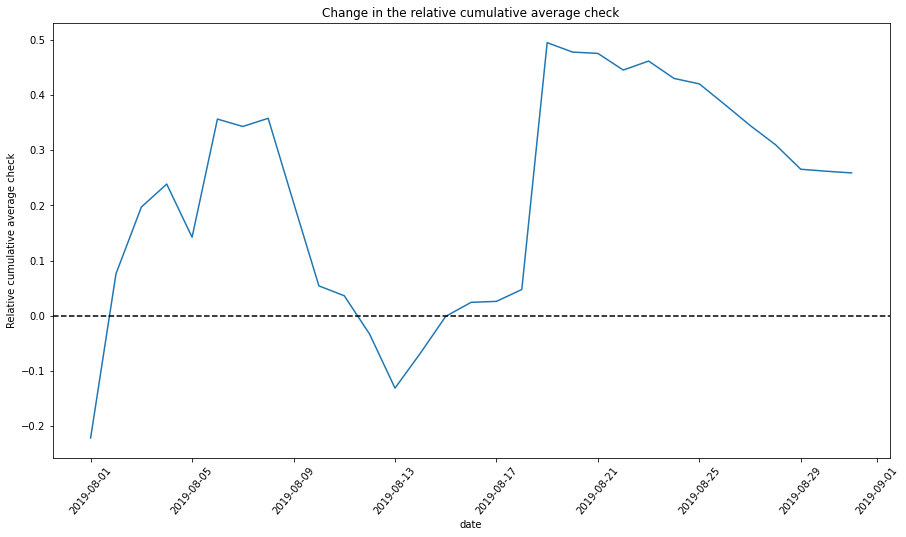

In [27]:
plt.figure(figsize = (15,8))
plt.xlabel('date')
plt.ylabel('Relative cumulative average check')
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']
                                          )/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=50)
plt.title('Change in the relative cumulative average check')
plt.show()

From the graph, we can see that most of the time the graph of the difference between the groups jumps, leveling off only towards the end. Most likely, these are outliers and expensive orders.

<a id= 'Step_3_2' > </a>
###### Plot the cumulative conversion rate by group.

In [32]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

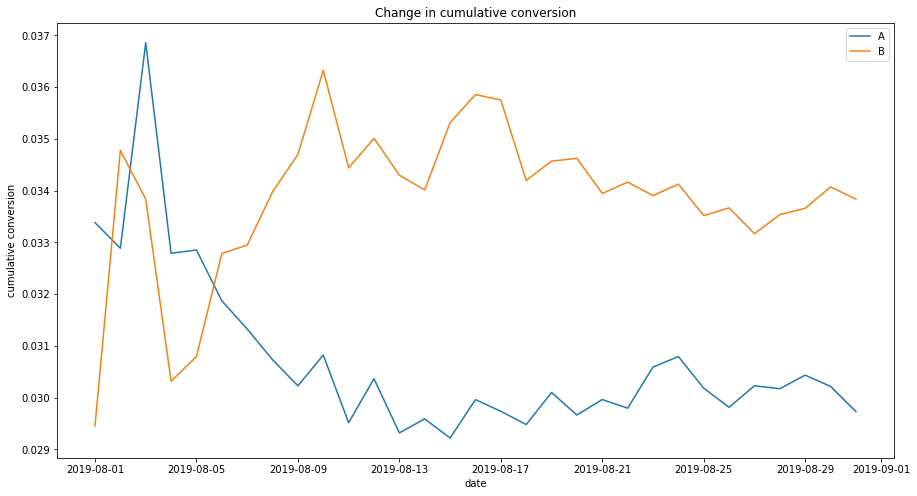

In [33]:
plt.figure(figsize = (15,8))
plt.xlabel('date')
plt.ylabel('cumulative conversion')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Change in cumulative conversion')
plt.show()

From the graph, we can see that the conversion has not yet been established. However, by the end of the observations, there was a trend towards equalization. The conversion rate of Group A was initially higher, but then it sank significantly and did not fluctuate much near the value of 0.03.

##### Plot the relative change in the cumulative conversion of group B to group A.

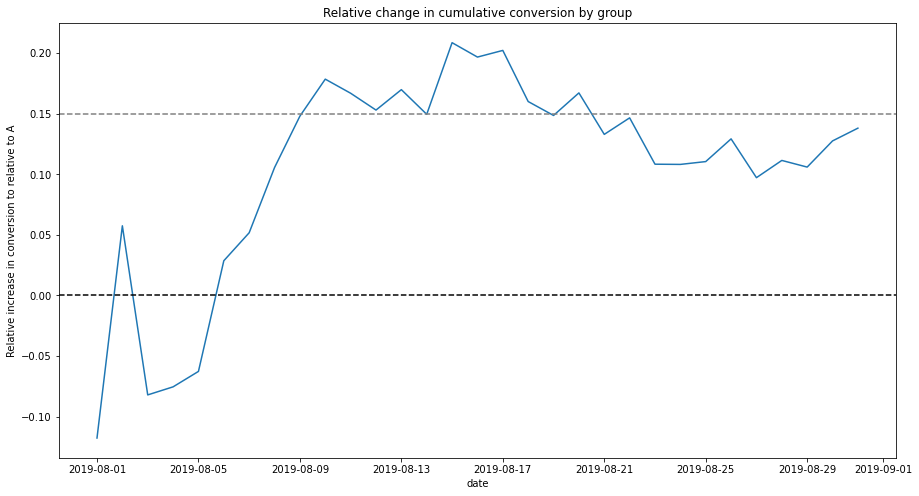

In [36]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize = (15,8))
plt.xlabel('date')
plt.ylabel('Relative increase in conversion to relative to A')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative increase in the conversion rate of group B relative to Group A")
plt.title('Relative change in cumulative conversion by group')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show()

The graph shows that at the beginning of the test, group B lost to A, then there was a sharp jump and the same drop. After the conversion of group B in relation to A began to grow rapidly and the conversion of B began to win over A. By the end of the observations, the conversion of group B recorded about a 15% increase relative to the conversion of A.

At this stage, it is not possible to accurately draw conclusions from the test, since there are anomalies and outliers in the data.

<a id = '# Step_4_2 ' > </a>
##### Let's build a dot graph of the number of orders by users.

In [37]:
orders_by_visitors = orders.groupby(['visitor_id', 'group'], as_index = False).agg({'transaction_id':'count'})
orders_by_visitors.columns = ['visitor_id', 'group', 'orders_count']
orders_by_visitors

,visitor_id,group,orders_count
0,5114589,B,1
1,6958315,B,1
2,8300375,A,1
3,8300375,B,1
4,11685486,A,1
...,...,...,...
1084,4266935830,B,1
1085,4278982564,A,1
1086,4279090005,B,1
1087,4281247801,B,1


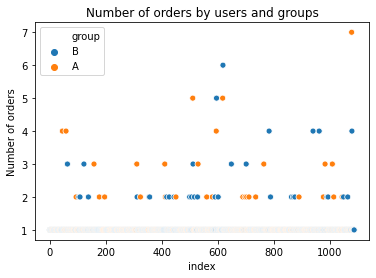

In [38]:
sns.scatterplot(data = orders_by_visitors, x = orders_by_visitors.index, y = orders_by_visitors['orders_count'], hue = 'group')
plt.title("Number of orders by users and groups")
plt.ylabel('Number of orders')
plt.xlabel("index")
plt.show()

Basically, users made one purchase at a time. However, we can see from the graph that there are a certain number of people who have made 3 or more purchases. For example, a customer from group A made 7 purchases, perhaps due to such outliers, we saw peaks earlier on the charts.

Let's calculate the percentiles of the number of orders.

In [39]:
print(np.percentile(orders_by_visitors['orders_count'], [95,99]))

[2. 4.]


We see, that there are no more than 5 percent of buyers who made 2 purchases or more and no more than 1 percent who made 4 or more.
It is logical to choose the number of orders equal to 2 for the lower limit.

<a id = 'Step_4_2' > </a>
##### Let's build a point graph of the cost of orders

In [40]:
x_values = pd.Series(range(0,len(orders['revenue'])))

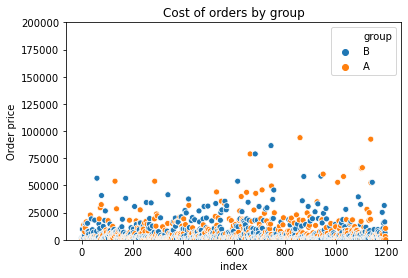

In [41]:
sns.scatterplot(data = orders, x = x_values, y = orders['revenue'], hue = 'group')
plt.title("Cost of orders by group")
plt.ylabel('Order price')
plt.xlabel("index")
plt.ylim(0,200000)
plt.show()

The chart shows that most orders do not exceed 30 thousand. There is also a small number of expensive orders(more than 50 thousand).

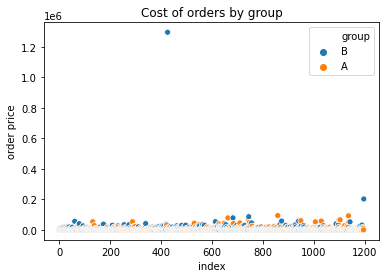

In [42]:
sns.scatterplot(data = orders, x = x_values, y = orders['revenue'], hue = 'group')
plt.title("Cost of orders by group")
plt.ylabel('order price')
plt.xlabel("index")
plt.show()

We see that one order from group B has an abnormal value of the cost (1200000), most likely this order affects the spikes on the average check chart.

Let's calculate the percentiles of the cost of orders.

In [43]:
print(np.percentile(orders['revenue'], [95,99]))

[28000.  58233.2]


We see that no more than 5 percent of orders with a price greater than 28,000 and no more than 1 percent with a price greater than 58,000. In this case, it is also logical to take 95 percentile for the lower limit.

### Conclusion

At this step, various graphs were built for the main indicators on the "raw" data, divided into test groups.
From the graphs of cumulative indicators, we can conclude that group B performs better. At the same time, the average check can not confidently say which of the groups wins due to emissions that strongly affected the overall picture, however the conversion and revenue B wins from A. On the graph of the cumulative revenue of group B, you can also see a fairly sharp spike, but this was preceded by a fairly stable trend, showing better results than group A.

We also chose the lower limits of the cost and number of orders to "clean" the data from abnormal values and outliers.

<a id = 'Step_4_2' > </a>
### Step 3. Calculate the statistical significance.

##### We consider the statistical significance of differences in conversion between groups based on " raw " data.

In [44]:
# the number of sessions by groups and days.
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


In [45]:
# number of orders by groups and days
ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [46]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [47]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


In [48]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders'] 

In [49]:
# the number of users who ordered at least 1 time
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders'] 

We will declare the variables sample and sample, in which the number of orders will correspond to users from different groups. Those who did not order anything will be matched with zeros.

In [50]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

0-hypothesis - there are no statistically significant differences in conversion between the groups.

An alternative hypothesis is that there are statistically significant differences in conversions between the groups.

Let's check with the Mann-Whitney U-test

In [51]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


The first number is p-value < 0.05, hence the null hypothesis can be rejected. Thus, the differences in conversion are statistically significant and the relative gain of group B is 13.8 %.
We can say that most likely, according to the raw data, there is a difference in conversions.

##### Let's calculate the statistical significance of the differences in the average order receipt between the groups based on the" raw " data.

Null hypothesis - there are no statistically significant differences in the average check between the groups.

An alternative hypothesis is that there are statistically significant differences between the groups in the average check with an advantage of more than 20 percent

In [52]:
# Passing the mann whitney u () criterion data on revenue from orders.
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.365
0.259


P-value is significantly > 0.05. So, there is no reason to reject the null hypothesis and assume that there are differences in the average check. At the same time, the average check of group B is significantly higher than the average check of A.

##### Let's calculate the statistical significance of the differences in conversion between the groups based on the" cleaned " data.
Find out the number of abnormal users.

Null hypothesis: there are no statistically significant differences between conversions in the "cleared" groups

Alternative hypothesis: differences in conversions are statistically significant

In [53]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitor_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.shape)

(68,)


There are 68 abnormal users.

In [54]:
# We consider the statistical significance for the conversion on the cleared data.
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 
# We apply the Mann-Whitney criterion
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.006
0.204


The results did not change significantly, and the differences in conversion rates were also statistically significant (B group wins)

##### Let's calculate the statistical significance of the differences in the average order receipt between the groups based on the" cleared " data.

In [55]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.394
-0.017


The p-value has increased, and the difference between the groups on the cleared data is almost nonexistent( 1.7% group B loses).

## Conclusions

* Differences in conversion are statistically significant for both raw and filtered data, with Group B showing better results compared to Group A
* There is no statistically significant difference in the average check between the groups, neither in the "raw" data, nor in the data after filtering the anomalies, while in the cleared data, group B slightly loses A, most likely the peak in the "raw" data graph distorted the overall picture
* The graph of the difference in conversion between groups reports that the results of group B are better than group A and have a fairly stable growth
* The graph of the difference in the average check indicates that the results of group B are better than A, but this is largely due to outliers.

Based on the stated facts, the test should be continued in order to level out the impact of outliers on the average check of group B. The conversion rates have improved.

<a id = 'Step_5_3' > </a>
# General conclusion

In this project, the first step was to prioritize hypotheses using the RICE and ICE frameworks. The priorities of the hypotheses were different due to the REACH parameter taken into account in the RICE framework, so, for example, in this case, the priority hypothesis was to add a subscription form to each page, since this change will affect all users without exception.
And according to the ICE framework, the hypothesis of adding discounts for the birthday turned out to be a priority, since it has a small coverage, but most likely it is quite effective.

Then the A/B test was analyzed. Graphs of various cumulative metrics were plotted and Man-Whitney statistical tests were performed on " raw " data. After removing the outliers, the tests were performed again.
Based on the results obtained, it was concluded that it is necessary to continue the test, since the hypothesis that there are no statistically significant differences in conversion between groups can be rejected and conversion B wins over A,
and the hypothesis that there are no statistically significant differences in the average check between groups can not be rejected.